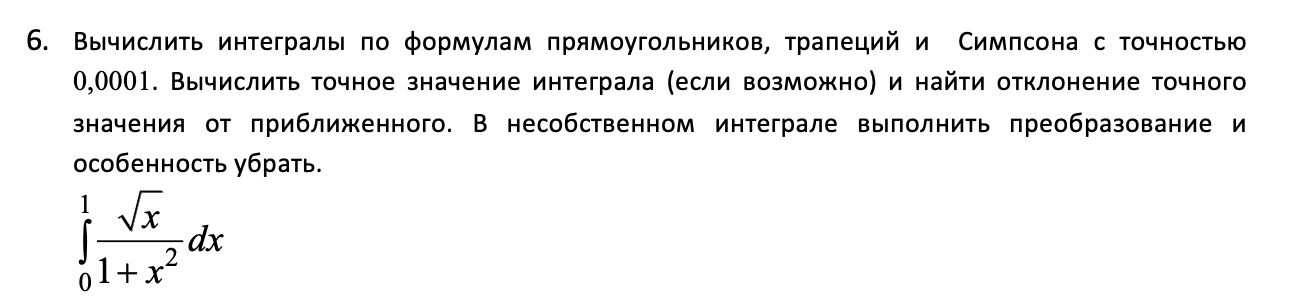

In [36]:
from math import sin, sqrt
import sympy

def f(x):
    return sqrt(x)/(1+x**2)

def dop_rectangle(f, a, b, n):
    h = (b-a)/float(n)
    total = sum([f((a + (k*h))) for k in range(0, n)])
    result = h * total
    return result

 
def Integral(a, b):
    x = sympy.Symbol('x')
    I = sympy.sqrt(x)/(1+x**2)
    return float(sympy.integrate(I, (x, 0, 1)))

def rectangle_method(left, right, eps):
    n = 2
    a1 = dop_rectangle(f, 0, 1, n)
    n *= 2
    a2 = dop_rectangle(f, 0, 1, n)

    while abs(a1 - a2) > 0.0001:
        a2 = a1
        n *= 2
        a1 = dop_rectangle(f, 0, 1, n)
    return a1

def trapezoid_method(a,b,eps):
    s= 0.5*(f(a)+f(b))
    x= a + eps
    while (abs(x - b) > eps):
        s += f(x)
        x += eps
    return eps * s
 
def sympson_method(left, right, eps):
    h = (right - left) / 10
 
    result = f(left) + f(right)

    for i in range(1, 10):
        if i % 2 != 0:
            result += 4 * f(left + i * h)
        else:
            result += 2 * f(left + i * h)
    return result * h / 3
    
eps = 0.0001
integral = Integral(0, 1)
rectangle = rectangle_method(0, 1, eps)
sympson = sympson_method(0, 1, eps)
trapezoid = trapezoid_method(0, 1, eps)

print(f"Точное решение: {integral}")
print(f"Решение методом прямоугольников: {rectangle}. Отличие от точного решения: {abs(integral - rectangle)}")
print(f"Решение методом трапеций: {trapezoid}. Отличие от точного решения: {abs(integral - trapezoid)}")
print(f"Решение методом Симпсона: {sympson}. Отличие от точного решения: {abs(integral - sympson)}")


Точное решение: 0.4874954943993611
Решение методом прямоугольников: 0.4874336649783321. Отличие от точного решения: 6.182942102894717e-05
Решение методом трапеций: 0.4874952863048073. Отличие от точного решения: 2.0809455375525587e-07
Решение методом Симпсона: 0.4849356374285622. Отличие от точного решения: 0.002559856970798857
